In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [60]:
df=pd.read_csv("Restaurant_Reviews.csv")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [58]:
df["Liked"].value_counts()

1    500
0    500
Name: Liked, dtype: int64

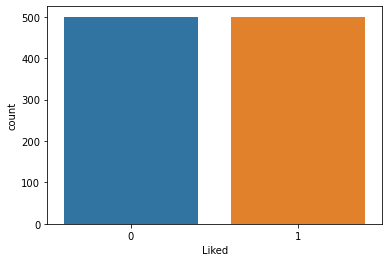

In [20]:
sns.countplot(df["Liked"])

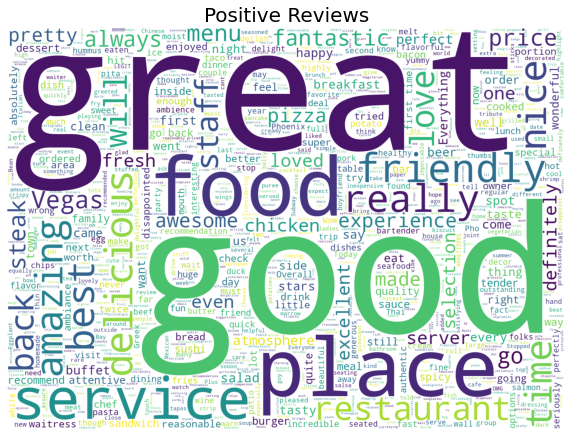

In [31]:
positive=df[df.Liked==1]
plt.figure(figsize=(10,10))
wordcloud = WordCloud(  background_color='white',max_words = 1000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(positive.Review))
plt.title("Positive Reviews", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

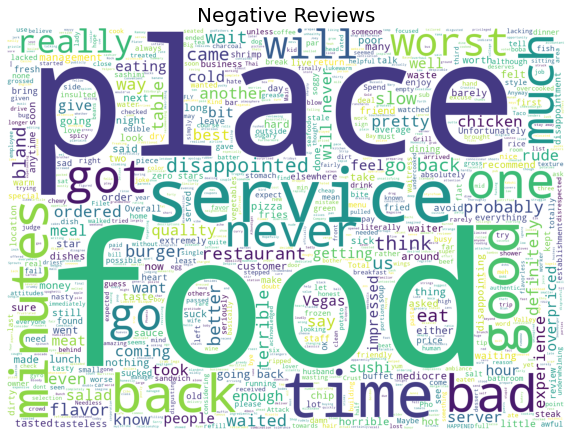

In [53]:
neg=df[df.Liked==0]
plt.figure(figsize=(10,20))
wordcloud = WordCloud(
                          background_color='white',max_words = 1000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(neg.Review))
plt.title("Negative Reviews", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

# Pre Processing

In [63]:
corpus = []

# Looping till 1000 because the number of rows are 1000
for i in range(0, 1000):
    # Removing the special character from the reviews and replacing it with space character
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])

    # Converting the review into lower case character
    review = review.lower()

    # Tokenizing the review by words
    review_words = review.split()

    # Removing the stop words using nltk stopwords
    review_words = [word for word in review_words if not word in a]

    # Lemmatizing the words
    
    review = [lemma(word) for word in review_words]

    # Joining the stemmed words
    review = ' '.join(review)

    # Creating a corpus
    corpus.append(review)

In [64]:

df["new"]=corpus
df.head()

,Review,Liked,new
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,selection menu great price


In [62]:
a=set(stopwords.words('english'))
a.remove("not")


In [65]:
cv = CountVectorizer()
bag_of_words = cv.fit(df["new"])
fea=bag_of_words.get_feature_names()
bow=bag_of_words.transform(df.new).toarray()

['absolute', 'absolutely', 'absolutley', 'accident', 'accommodation', 'accomodate', 'accordingly', 'accountant', 'ache', 'acknowledge', 'acros', 'actual', 'actually', 'add', 'affordable', 'afternoon', 'ago', 'ahead', 'airline', 'airport', 'ala', 'albondiga', 'allergy', 'almond', 'almost', 'alone', 'also', 'although', 'alway', 'amaze', 'ambiance', 'ambience', 'amount', 'ample', 'andddd', 'angry', 'annoy', 'another', 'anticipate', 'anymore', 'anyone', 'anythe', 'anytime', 'anyway', 'apart', 'apologize', 'apology', 'app', 'appall', 'apparently', 'appeal', 'appetite', 'appetizer', 'apple', 'approval', 'area', 'arepa', 'aria', 'around', 'array', 'arrive', 'article', 'ask', 'assure', 'atmosphere', 'atrociou', 'attach', 'attack', 'attention', 'attentive', 'attitude', 'auju', 'authentic', 'average', 'avocado', 'avoid', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'ayce', 'az', 'baba', 'baby', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakery', 'baklava', 'ball', 'bamboo', 'banana', 'ban

In [67]:
df1=pd.DataFrame(bow,columns=fea)

In [68]:
df1

,absolute,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledge,...,year,yellow,yellowtail,yelper,yet,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
lemma("stopped")

'stop'

In [61]:

from pattern.en import lemma, lexeme 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df1, df["Liked"], test_size = 0.20, random_state)

In [88]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [89]:
LR.score(X_test,y_test)

0.79

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [49]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=3, max_depth=30, min_samples_split=5, min_samples_leaf=1)
DTC.fit(X_train,y_train)
DTC.score(X_test,y_test)

0.75

In [131]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=2)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.8

In [51]:
from sklearn.svm import SVC
sv=SVC(kernel = 'linear', random_state = 0, probability=True)
sv.fit(X_train,y_train)
sv.score(X_test,y_test)

0.785

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=20,
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=200, random_state=3)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.81

In [69]:
df2=df1
df2["Liked"]=df["Liked"]
df2

,absolute,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledge,...,yellow,yellowtail,yelper,yet,yucky,yukon,yum,yummy,zero,Liked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
print (fea)

['absolute', 'absolutely', 'absolutley', 'accident', 'accommodation', 'accomodate', 'accordingly', 'accountant', 'ache', 'acknowledge', 'acros', 'actual', 'actually', 'add', 'affordable', 'afternoon', 'ago', 'ahead', 'airline', 'airport', 'ala', 'albondiga', 'allergy', 'almond', 'almost', 'alone', 'also', 'although', 'alway', 'amaze', 'ambiance', 'ambience', 'amount', 'ample', 'andddd', 'angry', 'annoy', 'another', 'anticipate', 'anymore', 'anyone', 'anythe', 'anytime', 'anyway', 'apart', 'apologize', 'apology', 'app', 'appall', 'apparently', 'appeal', 'appetite', 'appetizer', 'apple', 'approval', 'area', 'arepa', 'aria', 'around', 'array', 'arrive', 'article', 'ask', 'assure', 'atmosphere', 'atrociou', 'attach', 'attack', 'attention', 'attentive', 'attitude', 'auju', 'authentic', 'average', 'avocado', 'avoid', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'ayce', 'az', 'baba', 'baby', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakery', 'baklava', 'ball', 'bamboo', 'banana', 'ban

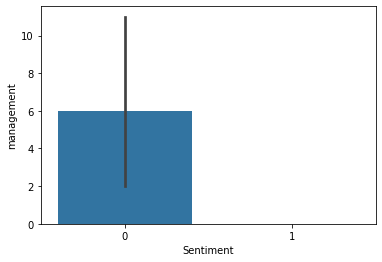

In [87]:
sns.barplot(x="Liked",y="management",data=df2,estimator=sum)
plt.xlabel('Sentiment')
plt.show()


In [266]:
import joblib
joblib.dump(cv, "cv.pkl")
joblib.dump(rf, "model.pkl")

['model.pkl']

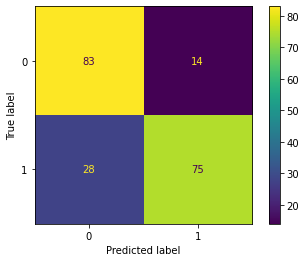

Accuracy of Logistic Regression : 79.0 %


In [138]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test)  
plt.show() 
print("Accuracy of Logistic Regression :",LR.score(X_test,y_test)*100,"%")

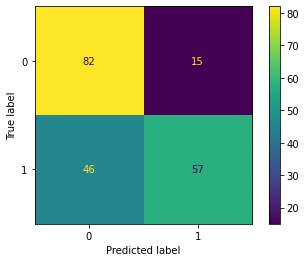

       Accuracy of KNN : 69.5 %


In [143]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show() 
print("       Accuracy of KNN :",knn.score(X_test,y_test)*100,"%")

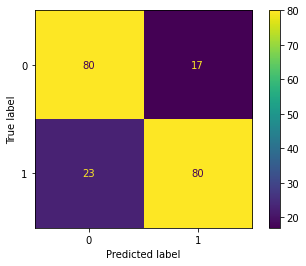

       Accuracy of Naive Bayes : 80.0 %


In [145]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show() 
print("       Accuracy of Naive Bayes :",classifier.score(X_test,y_test)*100,"%")

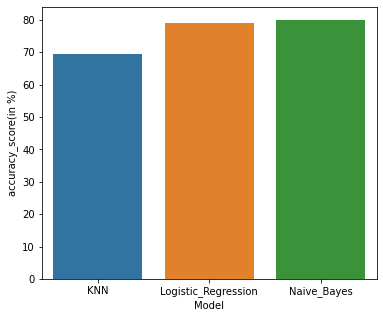

In [160]:
plt.figure(figsize=(6,5))
Score=[['KNN',knn.score(X_test,y_test)],['Logistic_Regression',LR.score(X_test,y_test)],['Naive_Bayes',classifier.score(X_test,y_test)]]
Sc=pd.DataFrame(Score,columns=['Model','accuracy_score'])
Sc["accuracy_score"]=Sc["accuracy_score"]*100
sns.barplot(x="Model",y="accuracy_score",data=Sc)
plt.ylabel("accuracy_score(in %)")
plt.show()